# Bank Marketing Data Set
Download: Data Folder, Data Set Description

Abstract: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).



Attribute Information:

Input variables:
#### bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### social and economic context attributes (NOT PRESENT IN THE DATASET)
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
data = pd.read_csv("bank.csv", sep = ";")


### Sanity Checks

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
data.shape


(4521, 17)

In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### EDA Preprocessing

In [7]:
# Insights
# 1 Balance column not found in dataset explanation, so can safely drop the column; Drop duration column as per lengend

# 2 Plot graph job description vs. y target variable to find out how many of the particular job category take TDs
# 3 Plot graph marital vs. y to find out how many of the people take TDs
# 4 Plot graph education vs. y to find out how many of the people take TDs
# 5 Plot graph defaulted vs. y to find out how many of the people take TDs
# 6 plot graph housing  vs. y to find out how many of the people take TDs 
# 7 plot graph loan vs. y to find out how many of the people take TDs 
# 8 plot graph contact vs. y to find out how many of the people take TDs 
# 9 plot graph day  vs. y to find out how many of the people take TDs 
#10 plot graph month  vs. y to find out how many of the people take TDs
#11 plot graph duration vs. y to find out how many of the people take TDs
#12 plot graph campaign vs. y to find out how many of the people take TDs
#13 plot graph pdays vs. y to find out how many of the people take TDs
#14 plot graph previous vs. y to find out how many of the people take TDs
#15 plot graph poutcome vs. y to find out how many of the people take TDs

#16 Examine each categorical column & decide on Label encoding strategy

In [8]:
# 1 Drop balance & duaration columns from the dataset
del(data['balance'])
del(data['duration'])


In [9]:
data.shape

(4521, 15)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   housing    4521 non-null   object
 6   loan       4521 non-null   object
 7   contact    4521 non-null   object
 8   day        4521 non-null   int64 
 9   month      4521 non-null   object
 10  campaign   4521 non-null   int64 
 11  pdays      4521 non-null   int64 
 12  previous   4521 non-null   int64 
 13  poutcome   4521 non-null   object
 14  y          4521 non-null   object
dtypes: int64(5), object(10)
memory usage: 529.9+ KB


In [11]:
# 2 Plot graph of job vs. y (target variable) to find out how many of the particular job category take TDs

# make a copy of the data set first
plt_data = data.copy()
plt_data.rename(columns={"y":"target"},inplace=True)
plt_data.head()

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no


In [12]:
# filter the rows where target="yes"
yes_data = plt_data[plt_data["target"] == "yes"]
print(yes_data.shape)
yes_data.head()


(521, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
13,20,student,single,secondary,no,no,no,cellular,30,apr,1,-1,0,unknown,yes
30,68,retired,divorced,secondary,no,no,no,telephone,14,jul,2,-1,0,unknown,yes
33,32,management,single,tertiary,no,yes,no,cellular,26,aug,6,-1,0,unknown,yes
34,49,technician,married,tertiary,no,no,no,cellular,13,aug,3,-1,0,unknown,yes
36,78,retired,divorced,primary,no,no,no,telephone,22,oct,1,-1,0,unknown,yes


In [13]:
# filter the rows where target="no"
no_data = plt_data[plt_data["target"] == "no"]
print(no_data.shape)
no_data.head()


(4000, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no


<AxesSubplot:xlabel='job'>

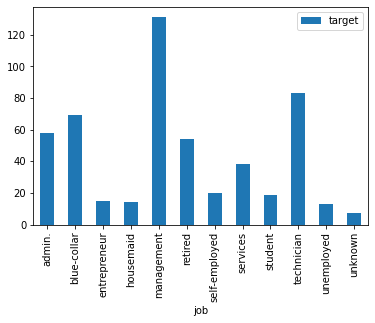

In [14]:
# determine the count of YES for each job type
cols_to_see = ["job", "target"]
yes_data = yes_data[cols_to_see].groupby("job").count()
yes_data
yes_data.plot.bar()

<AxesSubplot:xlabel='job'>

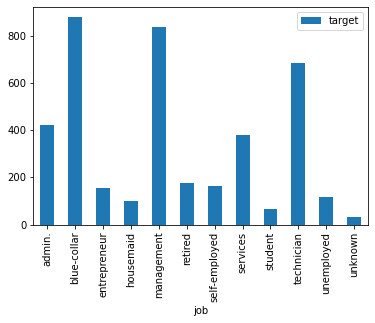

In [15]:
# determine the count of No for each job type
cols_to_see = ["job", "target"]
no_data = no_data[cols_to_see].groupby("job").count()
no_data.plot.bar()

<AxesSubplot:xlabel='job', ylabel='count'>

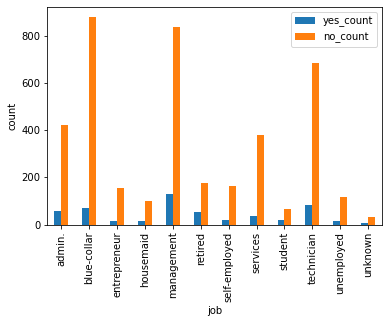

In [16]:
result = pd.DataFrame(yes_data)
result.rename(columns={"target":"yes_count"}, inplace=True)
result['no_count'] = no_data
result.head()
result.plot.bar(ylabel="count")

In [17]:
# 3 Plot graph marital vs. y to find out how many of the people take TDs
# make a copy of the data set first
plt_data = data.copy()
plt_data.rename(columns={"y":"target"},inplace=True)
plt_data.head()

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no


In [18]:
# filter the rows where target="yes"
yes_data = plt_data[plt_data["target"] == "yes"]
print(yes_data.shape)
yes_data.head()

(521, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
13,20,student,single,secondary,no,no,no,cellular,30,apr,1,-1,0,unknown,yes
30,68,retired,divorced,secondary,no,no,no,telephone,14,jul,2,-1,0,unknown,yes
33,32,management,single,tertiary,no,yes,no,cellular,26,aug,6,-1,0,unknown,yes
34,49,technician,married,tertiary,no,no,no,cellular,13,aug,3,-1,0,unknown,yes
36,78,retired,divorced,primary,no,no,no,telephone,22,oct,1,-1,0,unknown,yes


In [19]:
# filter the rows where target="no"
no_data = plt_data[plt_data["target"] == "no"]
print(no_data.shape)
no_data.head()


(4000, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no


<AxesSubplot:xlabel='marital'>

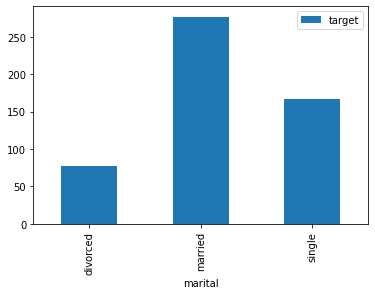

In [20]:
# determine the count of YES for each marital status
cols_to_see = ["marital", "target"]
yes_data = yes_data[cols_to_see].groupby("marital").count()
yes_data
yes_data.plot.bar()

<AxesSubplot:xlabel='marital'>

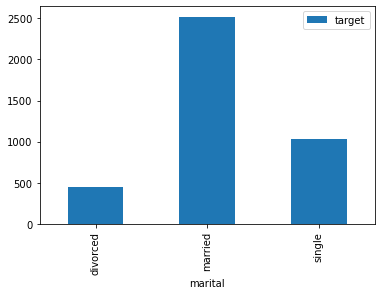

In [21]:
# determine the count of No for each job type
cols_to_see = ["marital", "target"]
no_data = no_data[cols_to_see].groupby("marital").count()
no_data.plot.bar()

<AxesSubplot:xlabel='marital', ylabel='count'>

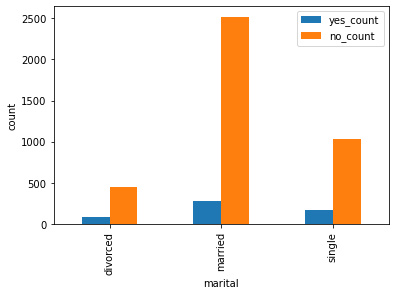

In [22]:
result = pd.DataFrame(yes_data)
result.rename(columns={"target":"yes_count"}, inplace=True)
result['no_count'] = no_data
result.head()
result.plot.bar(ylabel="count")

In [23]:
# 4 Plot graph education vs. y to find out how many of the people take TDs
# make a copy of the data set first
plt_data = data.copy()
plt_data.rename(columns={"y":"target"},inplace=True)
plt_data.head()

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no


In [24]:
# filter the rows where target="yes"
yes_data = plt_data[plt_data["target"] == "yes"]
print(yes_data.shape)
yes_data.head()

(521, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
13,20,student,single,secondary,no,no,no,cellular,30,apr,1,-1,0,unknown,yes
30,68,retired,divorced,secondary,no,no,no,telephone,14,jul,2,-1,0,unknown,yes
33,32,management,single,tertiary,no,yes,no,cellular,26,aug,6,-1,0,unknown,yes
34,49,technician,married,tertiary,no,no,no,cellular,13,aug,3,-1,0,unknown,yes
36,78,retired,divorced,primary,no,no,no,telephone,22,oct,1,-1,0,unknown,yes


In [25]:
# filter the rows where target="no"
no_data = plt_data[plt_data["target"] == "no"]
print(no_data.shape)
no_data.head()

(4000, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no


<AxesSubplot:xlabel='education'>

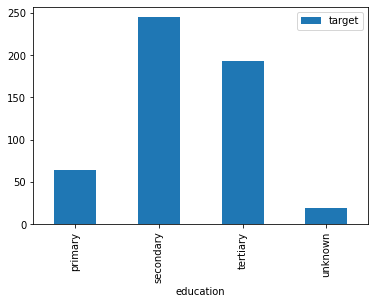

In [26]:
# determine the count of YES for each marital status
cols_to_see = ["education", "target"]
yes_data = yes_data[cols_to_see].groupby("education").count()
yes_data
yes_data.plot.bar()


<AxesSubplot:xlabel='education'>

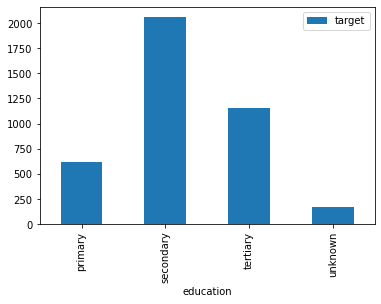

In [27]:
# determine the count of No for each job type
cols_to_see = ["education", "target"]
no_data = no_data[cols_to_see].groupby("education").count()
no_data.plot.bar()

<AxesSubplot:xlabel='education', ylabel='count'>

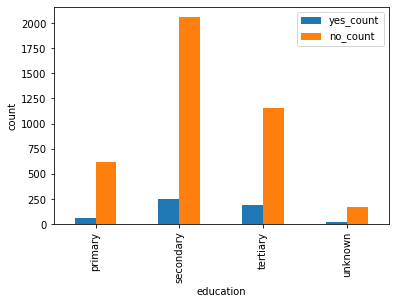

In [28]:
result = pd.DataFrame(yes_data)
result.rename(columns={"target":"yes_count"}, inplace=True)
result['no_count'] = no_data
result.head()
result.plot.bar(ylabel="count")

In [29]:
# 5 Plot graph defaulted vs. y to find out how many of the people take TDs
plt_data = data.copy()
plt_data.rename(columns={"y":"target"}, inplace = True)
plt_data

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,no,no,cellular,6,feb,4,211,3,other,no


In [30]:
#filter the rows where target is yes
yes_data = plt_data[plt_data["target"]=="yes"]
print(yes_data.shape)
(yes_data)

(521, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
13,20,student,single,secondary,no,no,no,cellular,30,apr,1,-1,0,unknown,yes
30,68,retired,divorced,secondary,no,no,no,telephone,14,jul,2,-1,0,unknown,yes
33,32,management,single,tertiary,no,yes,no,cellular,26,aug,6,-1,0,unknown,yes
34,49,technician,married,tertiary,no,no,no,cellular,13,aug,3,-1,0,unknown,yes
36,78,retired,divorced,primary,no,no,no,telephone,22,oct,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,26,technician,single,secondary,no,yes,no,unknown,28,may,3,-1,0,unknown,yes
4503,60,self-employed,married,primary,no,no,yes,cellular,29,jul,6,-1,0,unknown,yes
4504,42,blue-collar,single,secondary,no,yes,yes,cellular,13,may,3,370,4,failure,yes
4505,32,admin.,single,secondary,no,yes,no,unknown,26,may,3,-1,0,unknown,yes


In [31]:
#filter the rows where target is no
no_data = plt_data[plt_data["target"]=="no"]
print(no_data.shape)
(no_data)

(4000, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,no,no,cellular,6,feb,4,211,3,other,no


<AxesSubplot:xlabel='default'>

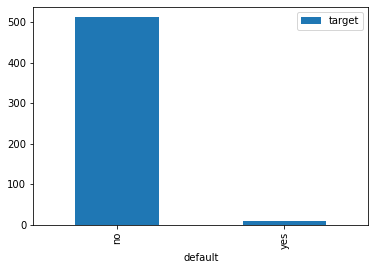

In [32]:
# determine the count of YES for each defaulter
cols_to_see = ["default", "target"]
yes_data = yes_data[cols_to_see].groupby("default").count()
yes_data
yes_data.plot.bar()


<AxesSubplot:xlabel='default'>

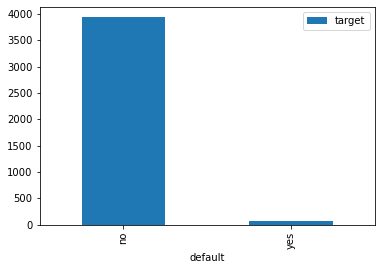

In [33]:
# determine the count of NO for each defaulter
cols_to_see = ["default", "target"]
no_data = no_data[cols_to_see].groupby("default").count()
no_data.plot.bar()

<AxesSubplot:xlabel='default', ylabel='count'>

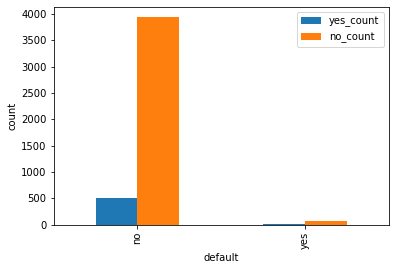

In [34]:
result = pd.DataFrame(yes_data)
result.rename(columns={"target":"yes_count"}, inplace=True)
result['no_count'] = no_data
result.head()
result.plot.bar(ylabel="count")

In [35]:
# 6 plot graph housing  vs. y to find out how many of the people take TDs 
plt_data = data.copy()
plt_data.rename(columns={"y":"target"}, inplace = True)
plt_data

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,no,no,cellular,6,feb,4,211,3,other,no


In [36]:
#filter the rows where target is yes
yes_data = plt_data[plt_data["target"]=="yes"]
print(yes_data.shape)
(yes_data)

(521, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
13,20,student,single,secondary,no,no,no,cellular,30,apr,1,-1,0,unknown,yes
30,68,retired,divorced,secondary,no,no,no,telephone,14,jul,2,-1,0,unknown,yes
33,32,management,single,tertiary,no,yes,no,cellular,26,aug,6,-1,0,unknown,yes
34,49,technician,married,tertiary,no,no,no,cellular,13,aug,3,-1,0,unknown,yes
36,78,retired,divorced,primary,no,no,no,telephone,22,oct,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,26,technician,single,secondary,no,yes,no,unknown,28,may,3,-1,0,unknown,yes
4503,60,self-employed,married,primary,no,no,yes,cellular,29,jul,6,-1,0,unknown,yes
4504,42,blue-collar,single,secondary,no,yes,yes,cellular,13,may,3,370,4,failure,yes
4505,32,admin.,single,secondary,no,yes,no,unknown,26,may,3,-1,0,unknown,yes


In [37]:
#filter the rows where target is no
no_data = plt_data[plt_data["target"]=="no"]
print(no_data.shape)
(no_data)

(4000, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,no,no,cellular,6,feb,4,211,3,other,no


<AxesSubplot:xlabel='housing'>

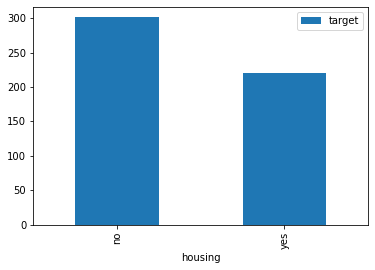

In [38]:
# determine the count of YES for each defaulter
cols_to_see = ["housing", "target"]
yes_data = yes_data[cols_to_see].groupby("housing").count()
yes_data
yes_data.plot.bar()

<AxesSubplot:xlabel='housing'>

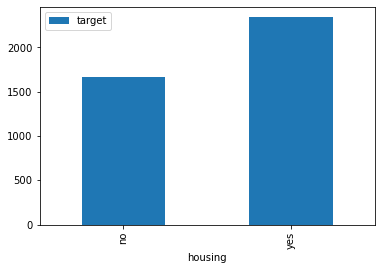

In [39]:
# determine the count of NO for each housing
cols_to_see = ["housing", "target"]
no_data = no_data[cols_to_see].groupby("housing").count()
no_data.plot.bar()

<AxesSubplot:xlabel='housing', ylabel='count'>

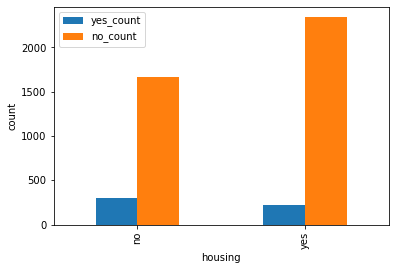

In [40]:
result = pd.DataFrame(yes_data)
result.rename(columns={"target":"yes_count"}, inplace=True)
result['no_count'] = no_data
result.head()
result.plot.bar(ylabel="count")

In [41]:
# 7 plot graph loan vs. y to find out how many of the people take TDs 
plt_data= data.copy()
plt_data.rename(columns={"y":"target"}, inplace = True)
plt_data

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,no,no,cellular,6,feb,4,211,3,other,no


In [42]:
#filter the rows where target is yes
yes_data = plt_data[plt_data["target"]=="yes"]
print(yes_data.shape)
(yes_data)

(521, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
13,20,student,single,secondary,no,no,no,cellular,30,apr,1,-1,0,unknown,yes
30,68,retired,divorced,secondary,no,no,no,telephone,14,jul,2,-1,0,unknown,yes
33,32,management,single,tertiary,no,yes,no,cellular,26,aug,6,-1,0,unknown,yes
34,49,technician,married,tertiary,no,no,no,cellular,13,aug,3,-1,0,unknown,yes
36,78,retired,divorced,primary,no,no,no,telephone,22,oct,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,26,technician,single,secondary,no,yes,no,unknown,28,may,3,-1,0,unknown,yes
4503,60,self-employed,married,primary,no,no,yes,cellular,29,jul,6,-1,0,unknown,yes
4504,42,blue-collar,single,secondary,no,yes,yes,cellular,13,may,3,370,4,failure,yes
4505,32,admin.,single,secondary,no,yes,no,unknown,26,may,3,-1,0,unknown,yes


In [43]:
#filter the rows where target is no
no_data = plt_data[plt_data["target"]=="no"]
print(no_data.shape)
(no_data)

(4000, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,no,no,cellular,6,feb,4,211,3,other,no


<AxesSubplot:xlabel='loan'>

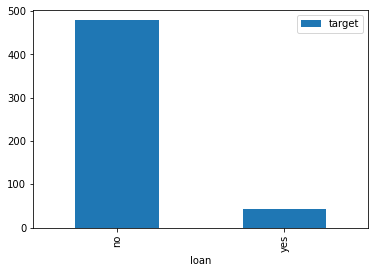

In [44]:
# determine the count of YES for each customer with loan 
cols_to_see = ["loan", "target"]
yes_data = yes_data[cols_to_see].groupby("loan").count()
yes_data
yes_data.plot.bar()

<AxesSubplot:xlabel='loan'>

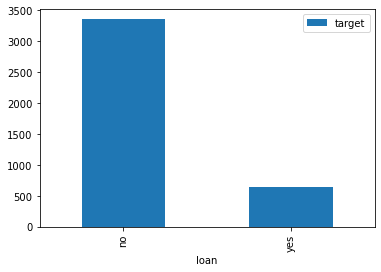

In [45]:
# determine the count of No for each customer with loan 
cols_to_see = ["loan", "target"]
no_data = no_data[cols_to_see].groupby("loan").count()
no_data.plot.bar()

<AxesSubplot:xlabel='loan', ylabel='count'>

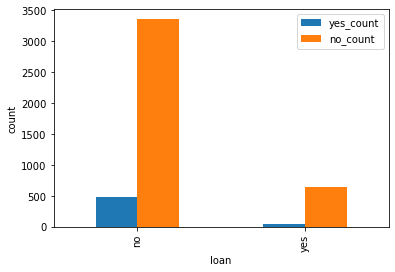

In [46]:
result = pd.DataFrame(yes_data)
result.rename(columns={"target":"yes_count"}, inplace=True)
result['no_count'] = no_data
result.head()
result.plot.bar(ylabel="count")

In [47]:
# 8 plot graph contact vs. y to find out how many of the people take TDs 
plt_data= data.copy()
plt_data.rename(columns={"y":"target"}, inplace = True)
plt_data

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,no,no,cellular,6,feb,4,211,3,other,no


In [48]:
#filter the rows where target is yes
yes_data = plt_data[plt_data["target"]=="yes"]
print(yes_data.shape)
(yes_data)

(521, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
13,20,student,single,secondary,no,no,no,cellular,30,apr,1,-1,0,unknown,yes
30,68,retired,divorced,secondary,no,no,no,telephone,14,jul,2,-1,0,unknown,yes
33,32,management,single,tertiary,no,yes,no,cellular,26,aug,6,-1,0,unknown,yes
34,49,technician,married,tertiary,no,no,no,cellular,13,aug,3,-1,0,unknown,yes
36,78,retired,divorced,primary,no,no,no,telephone,22,oct,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,26,technician,single,secondary,no,yes,no,unknown,28,may,3,-1,0,unknown,yes
4503,60,self-employed,married,primary,no,no,yes,cellular,29,jul,6,-1,0,unknown,yes
4504,42,blue-collar,single,secondary,no,yes,yes,cellular,13,may,3,370,4,failure,yes
4505,32,admin.,single,secondary,no,yes,no,unknown,26,may,3,-1,0,unknown,yes


In [49]:
#filter the rows where target is no
no_data = plt_data[plt_data["target"]=="no"]
print(no_data.shape)
(no_data)

(4000, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,no,no,cellular,6,feb,4,211,3,other,no


<AxesSubplot:xlabel='contact'>

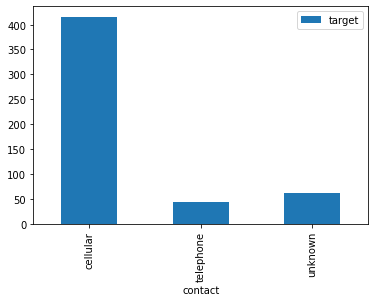

In [50]:
# determine the count of YES for each customer with contact
cols_to_see = ["contact", "target"]
yes_data = yes_data[cols_to_see].groupby("contact").count()
yes_data
yes_data.plot.bar()

<AxesSubplot:xlabel='contact'>

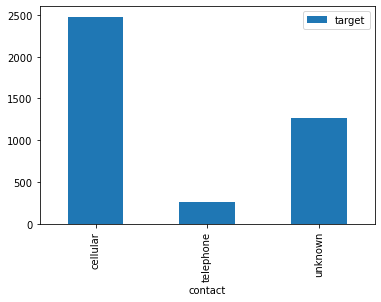

In [51]:
# determine the count of No for each customer with contact
cols_to_see = ["contact", "target"]
no_data = no_data[cols_to_see].groupby("contact").count()
no_data.plot.bar()

<AxesSubplot:xlabel='contact', ylabel='count'>

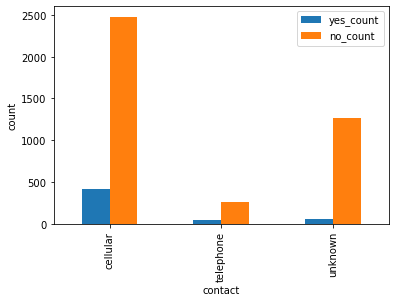

In [52]:
result = pd.DataFrame(yes_data)
result.rename(columns={"target":"yes_count"}, inplace=True)
result['no_count'] = no_data
result.head()
result.plot.bar(ylabel="count")

In [53]:
# 9 plot graph day vs. y to find out how many of the people take TDs 
plt_data= data.copy()
plt_data.rename(columns={"y":"target"}, inplace = True)
plt_data

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,no,no,cellular,6,feb,4,211,3,other,no


In [54]:
#filter the rows where target is yes
yes_data = plt_data[plt_data["target"]=="yes"]
print(yes_data.shape)
(yes_data)

(521, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
13,20,student,single,secondary,no,no,no,cellular,30,apr,1,-1,0,unknown,yes
30,68,retired,divorced,secondary,no,no,no,telephone,14,jul,2,-1,0,unknown,yes
33,32,management,single,tertiary,no,yes,no,cellular,26,aug,6,-1,0,unknown,yes
34,49,technician,married,tertiary,no,no,no,cellular,13,aug,3,-1,0,unknown,yes
36,78,retired,divorced,primary,no,no,no,telephone,22,oct,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,26,technician,single,secondary,no,yes,no,unknown,28,may,3,-1,0,unknown,yes
4503,60,self-employed,married,primary,no,no,yes,cellular,29,jul,6,-1,0,unknown,yes
4504,42,blue-collar,single,secondary,no,yes,yes,cellular,13,may,3,370,4,failure,yes
4505,32,admin.,single,secondary,no,yes,no,unknown,26,may,3,-1,0,unknown,yes


In [55]:
#filter the rows where target is no
no_data = plt_data[plt_data["target"]=="no"]
print(no_data.shape)
(no_data)

(4000, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,no,no,cellular,6,feb,4,211,3,other,no


<AxesSubplot:xlabel='day'>

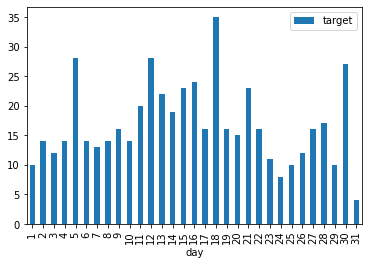

In [56]:
# determine the count of YES for each customer with day 
cols_to_see = ["day", "target"]
yes_data = yes_data[cols_to_see].groupby("day").count()
yes_data
yes_data.plot.bar()

<AxesSubplot:xlabel='day'>

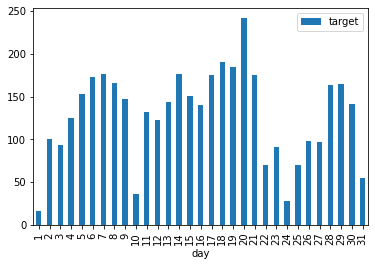

In [57]:
# determine the count of No for each customer with day 
cols_to_see = ["day", "target"]
no_data = no_data[cols_to_see].groupby("day").count()
no_data.plot.bar()

<AxesSubplot:xlabel='day', ylabel='count'>

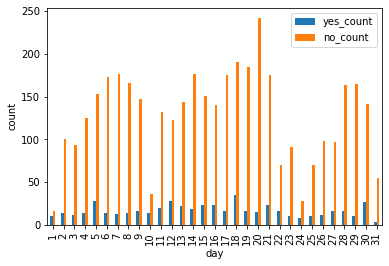

In [58]:
result = pd.DataFrame(yes_data)
result.rename(columns={"target":"yes_count"}, inplace=True)
result['no_count'] = no_data
result.head()
result.plot.bar(ylabel="count")

In [59]:
#10 plot graph month  vs. y to find out how many of the people take TDs

plt_data= data.copy()
plt_data.rename(columns={"y":"target"}, inplace = True)
plt_data



,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,no,no,cellular,6,feb,4,211,3,other,no


In [60]:
#filter the rows where target is yes
yes_data = plt_data[plt_data["target"]=="yes"]
print(yes_data.shape)
(yes_data)

(521, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
13,20,student,single,secondary,no,no,no,cellular,30,apr,1,-1,0,unknown,yes
30,68,retired,divorced,secondary,no,no,no,telephone,14,jul,2,-1,0,unknown,yes
33,32,management,single,tertiary,no,yes,no,cellular,26,aug,6,-1,0,unknown,yes
34,49,technician,married,tertiary,no,no,no,cellular,13,aug,3,-1,0,unknown,yes
36,78,retired,divorced,primary,no,no,no,telephone,22,oct,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,26,technician,single,secondary,no,yes,no,unknown,28,may,3,-1,0,unknown,yes
4503,60,self-employed,married,primary,no,no,yes,cellular,29,jul,6,-1,0,unknown,yes
4504,42,blue-collar,single,secondary,no,yes,yes,cellular,13,may,3,370,4,failure,yes
4505,32,admin.,single,secondary,no,yes,no,unknown,26,may,3,-1,0,unknown,yes


In [61]:
#filter the rows where target is no
no_data = plt_data[plt_data["target"]=="no"]
print(no_data.shape)
(no_data)

(4000, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,no,no,cellular,6,feb,4,211,3,other,no


In [62]:
# determine the count of YES for each customer with day 
cols_to_see = ["month", "target"]
yes_data = yes_data[cols_to_see].groupby("month").count()
yes_data

,target
month,
apr,56
aug,79
dec,9
feb,38
jan,16
jul,61
jun,55
mar,21
may,93


<AxesSubplot:xlabel='month'>

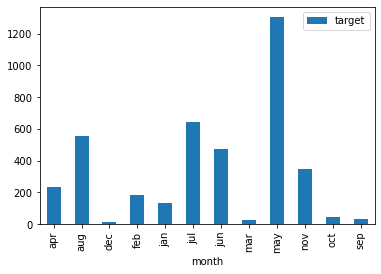

In [63]:
# determine the count of No for each customer with day 
cols_to_see = ["month", "target"]
no_data = no_data[cols_to_see].groupby("month").count()
no_data.plot.bar()

<AxesSubplot:xlabel='month', ylabel='count'>

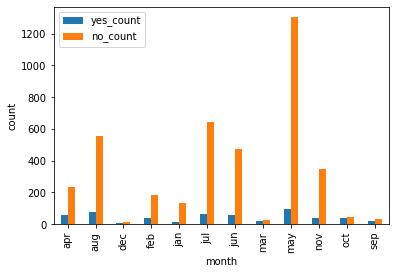

In [64]:
result = pd.DataFrame(yes_data)
result.rename(columns={"target":"yes_count"}, inplace=True)
result['no_count'] = no_data
result.head()
result.plot.bar(ylabel="count")

In [65]:
#11 plot graph duration vs. y to find out how many of the people take TDs
plt_data= data.copy()
plt_data.rename(columns={"y":"target"}, inplace = True)
plt_data

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,no,no,cellular,6,feb,4,211,3,other,no


In [66]:
#filter the rows where target is yes
yes_data = plt_data[plt_data["target"]=="yes"]
print(yes_data.shape)
(yes_data)

(521, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
13,20,student,single,secondary,no,no,no,cellular,30,apr,1,-1,0,unknown,yes
30,68,retired,divorced,secondary,no,no,no,telephone,14,jul,2,-1,0,unknown,yes
33,32,management,single,tertiary,no,yes,no,cellular,26,aug,6,-1,0,unknown,yes
34,49,technician,married,tertiary,no,no,no,cellular,13,aug,3,-1,0,unknown,yes
36,78,retired,divorced,primary,no,no,no,telephone,22,oct,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,26,technician,single,secondary,no,yes,no,unknown,28,may,3,-1,0,unknown,yes
4503,60,self-employed,married,primary,no,no,yes,cellular,29,jul,6,-1,0,unknown,yes
4504,42,blue-collar,single,secondary,no,yes,yes,cellular,13,may,3,370,4,failure,yes
4505,32,admin.,single,secondary,no,yes,no,unknown,26,may,3,-1,0,unknown,yes


In [67]:
#filter the rows where target is no
no_data = plt_data[plt_data["target"]=="no"]
print(no_data.shape)
(no_data)

(4000, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,no,no,cellular,6,feb,4,211,3,other,no


In [68]:
#12 plot graph campaign vs. y to find out how many of the people take TDs
plt_data= data.copy()
plt_data.rename(columns={"y":"target"}, inplace = True)
plt_data

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,no,no,cellular,6,feb,4,211,3,other,no


In [69]:
#filter the rows where target is yes
yes_data = plt_data[plt_data["target"]=="yes"]
print(yes_data.shape)
(yes_data)

(521, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
13,20,student,single,secondary,no,no,no,cellular,30,apr,1,-1,0,unknown,yes
30,68,retired,divorced,secondary,no,no,no,telephone,14,jul,2,-1,0,unknown,yes
33,32,management,single,tertiary,no,yes,no,cellular,26,aug,6,-1,0,unknown,yes
34,49,technician,married,tertiary,no,no,no,cellular,13,aug,3,-1,0,unknown,yes
36,78,retired,divorced,primary,no,no,no,telephone,22,oct,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,26,technician,single,secondary,no,yes,no,unknown,28,may,3,-1,0,unknown,yes
4503,60,self-employed,married,primary,no,no,yes,cellular,29,jul,6,-1,0,unknown,yes
4504,42,blue-collar,single,secondary,no,yes,yes,cellular,13,may,3,370,4,failure,yes
4505,32,admin.,single,secondary,no,yes,no,unknown,26,may,3,-1,0,unknown,yes


In [70]:
#filter the rows where target is no
no_data = plt_data[plt_data["target"]=="no"]
print(no_data.shape)
(no_data)

(4000, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,no,no,cellular,6,feb,4,211,3,other,no


In [71]:
# determine the count of YES for each customer with day 
cols_to_see = ["campaign", "target"]
yes_data = yes_data[cols_to_see].groupby("campaign").count()
yes_data

,target
campaign,
1,240
2,138
3,57
4,43
5,9
6,16
7,6
8,4
9,2


<AxesSubplot:xlabel='campaign'>

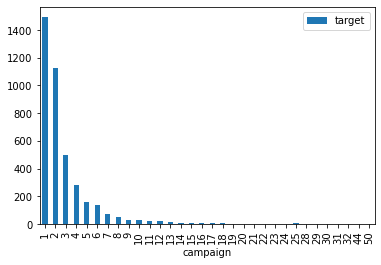

In [72]:
# determine the count of No for each customer with day 
cols_to_see = ["campaign", "target"]
no_data = no_data[cols_to_see].groupby("campaign").count()
no_data.plot.bar()

<AxesSubplot:xlabel='campaign', ylabel='count'>

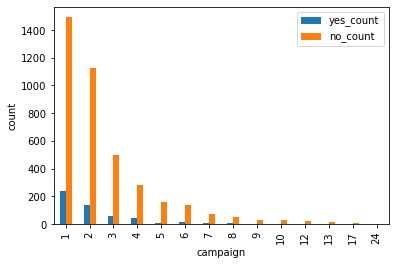

In [73]:
result = pd.DataFrame(yes_data)
result.rename(columns={"target":"yes_count"}, inplace=True)
result['no_count'] = no_data
result.head()
result.plot.bar(ylabel="count")

In [74]:
#13 plot graph pdays vs. y to find out how many of the people take TDs
plt_data= data.copy()
plt_data.rename(columns={"y":"target"}, inplace = True)
plt_data

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,no,no,cellular,6,feb,4,211,3,other,no


In [75]:
#filter the rows where target is yes
yes_data = plt_data[plt_data["target"]=="yes"]
print(yes_data.shape)
(yes_data)

(521, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
13,20,student,single,secondary,no,no,no,cellular,30,apr,1,-1,0,unknown,yes
30,68,retired,divorced,secondary,no,no,no,telephone,14,jul,2,-1,0,unknown,yes
33,32,management,single,tertiary,no,yes,no,cellular,26,aug,6,-1,0,unknown,yes
34,49,technician,married,tertiary,no,no,no,cellular,13,aug,3,-1,0,unknown,yes
36,78,retired,divorced,primary,no,no,no,telephone,22,oct,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,26,technician,single,secondary,no,yes,no,unknown,28,may,3,-1,0,unknown,yes
4503,60,self-employed,married,primary,no,no,yes,cellular,29,jul,6,-1,0,unknown,yes
4504,42,blue-collar,single,secondary,no,yes,yes,cellular,13,may,3,370,4,failure,yes
4505,32,admin.,single,secondary,no,yes,no,unknown,26,may,3,-1,0,unknown,yes


In [76]:
#filter the rows where target is no
no_data = plt_data[plt_data["target"]=="no"]
print(no_data.shape)
(no_data)

(4000, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,no,no,cellular,6,feb,4,211,3,other,no


In [77]:
# determine the count of YES for each customer with day 
cols_to_see = ["pdays", "target"]
yes_data = yes_data[cols_to_see].groupby("pdays").count()
yes_data

,target
pdays,
-1,337
1,2
38,1
56,1
57,1
...,...
474,2
541,1
683,1


<AxesSubplot:xlabel='pdays'>

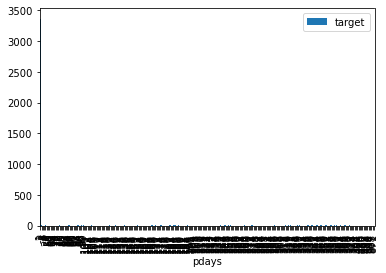

In [78]:
# determine the count of No for each customer with day 
cols_to_see = ["pdays", "target"]
no_data = no_data[cols_to_see].groupby("pdays").count()
no_data.plot.bar()

<AxesSubplot:xlabel='pdays', ylabel='count'>

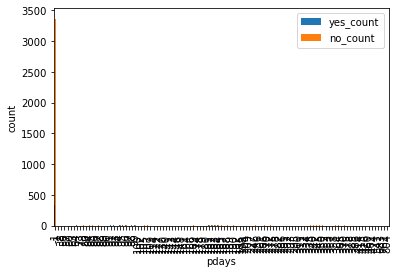

In [79]:
result = pd.DataFrame(yes_data)
result.rename(columns={"target":"yes_count"}, inplace=True)
result['no_count'] = no_data
result.head()
result.plot.bar(ylabel="count")

In [80]:
#14 plot graph previous vs. y to find out how many of the people take TDs
plt_data= data.copy()
plt_data.rename(columns={"y":"target"}, inplace = True)
plt_data

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,no,no,cellular,6,feb,4,211,3,other,no


In [81]:
#filter the rows where target is yes
yes_data = plt_data[plt_data["target"]=="yes"]
print(yes_data.shape)
(yes_data)

(521, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
13,20,student,single,secondary,no,no,no,cellular,30,apr,1,-1,0,unknown,yes
30,68,retired,divorced,secondary,no,no,no,telephone,14,jul,2,-1,0,unknown,yes
33,32,management,single,tertiary,no,yes,no,cellular,26,aug,6,-1,0,unknown,yes
34,49,technician,married,tertiary,no,no,no,cellular,13,aug,3,-1,0,unknown,yes
36,78,retired,divorced,primary,no,no,no,telephone,22,oct,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,26,technician,single,secondary,no,yes,no,unknown,28,may,3,-1,0,unknown,yes
4503,60,self-employed,married,primary,no,no,yes,cellular,29,jul,6,-1,0,unknown,yes
4504,42,blue-collar,single,secondary,no,yes,yes,cellular,13,may,3,370,4,failure,yes
4505,32,admin.,single,secondary,no,yes,no,unknown,26,may,3,-1,0,unknown,yes


In [82]:
#filter the rows where target is no
no_data = plt_data[plt_data["target"]=="no"]
print(no_data.shape)
(no_data)

(4000, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,no,no,cellular,6,feb,4,211,3,other,no


In [83]:
# determine the count of YES for each customer with day 
cols_to_see = ["previous", "target"]
yes_data = yes_data[cols_to_see].groupby("previous").count()
yes_data

,target
previous,
0,337
1,51
2,50
3,22
4,25
5,13
6,9
7,3
8,3


<AxesSubplot:xlabel='previous'>

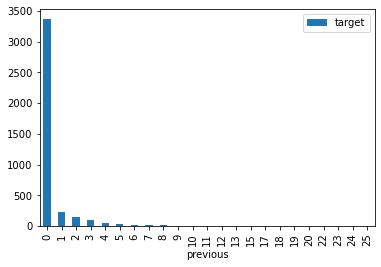

In [84]:
# determine the count of No for each customer with day 
cols_to_see = ["previous", "target"]
no_data = no_data[cols_to_see].groupby("previous").count()
no_data.plot.bar()

<AxesSubplot:xlabel='previous', ylabel='count'>

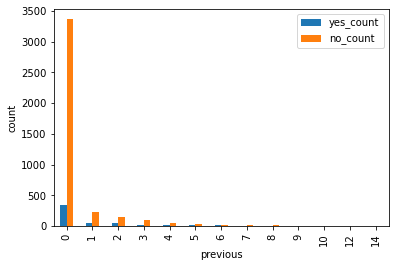

In [85]:
result = pd.DataFrame(yes_data)
result.rename(columns={"target":"yes_count"}, inplace=True)
result['no_count'] = no_data
result.head()
result.plot.bar(ylabel="count")

In [86]:
#15 plot graph poutcome vs. y to find out how many of the people take TDs
plt_data= data.copy()
plt_data.rename(columns={"y":"target"}, inplace = True)
plt_data

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,no,no,cellular,6,feb,4,211,3,other,no


In [87]:
#filter the rows where target is yes
yes_data = plt_data[plt_data["target"]=="yes"]
print(yes_data.shape)
(yes_data)

(521, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
13,20,student,single,secondary,no,no,no,cellular,30,apr,1,-1,0,unknown,yes
30,68,retired,divorced,secondary,no,no,no,telephone,14,jul,2,-1,0,unknown,yes
33,32,management,single,tertiary,no,yes,no,cellular,26,aug,6,-1,0,unknown,yes
34,49,technician,married,tertiary,no,no,no,cellular,13,aug,3,-1,0,unknown,yes
36,78,retired,divorced,primary,no,no,no,telephone,22,oct,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,26,technician,single,secondary,no,yes,no,unknown,28,may,3,-1,0,unknown,yes
4503,60,self-employed,married,primary,no,no,yes,cellular,29,jul,6,-1,0,unknown,yes
4504,42,blue-collar,single,secondary,no,yes,yes,cellular,13,may,3,370,4,failure,yes
4505,32,admin.,single,secondary,no,yes,no,unknown,26,may,3,-1,0,unknown,yes


In [88]:
#filter the rows where target is no
no_data = plt_data[plt_data["target"]=="no"]
print(no_data.shape)
(no_data)

(4000, 15)


,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,no,no,cellular,6,feb,4,211,3,other,no


In [89]:
# determine the count of YES for each customer with day 
cols_to_see = ["poutcome", "target"]
yes_data = yes_data[cols_to_see].groupby("poutcome").count()
yes_data

,target
poutcome,
failure,63
other,38
success,83
unknown,337


<AxesSubplot:xlabel='poutcome'>

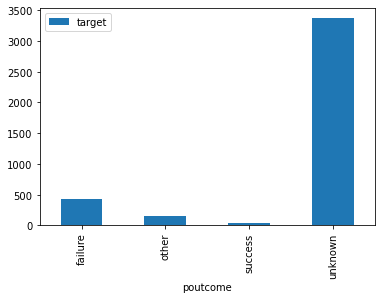

In [90]:
# determine the count of No for each customer with day 
cols_to_see = ["poutcome", "target"]
no_data = no_data[cols_to_see].groupby("poutcome").count()
no_data.plot.bar()

<AxesSubplot:xlabel='poutcome', ylabel='count'>

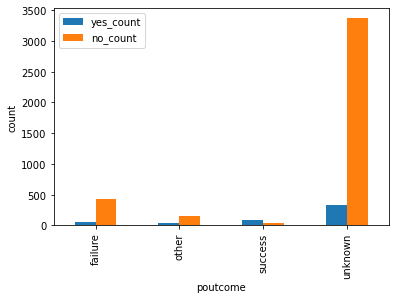

In [91]:
result = pd.DataFrame(yes_data)
result.rename(columns={"target":"yes_count"}, inplace=True)
result['no_count'] = no_data
result.head()
result.plot.bar(ylabel="count")

In [92]:
#16 Examine each categorical column & decide on Label encoding strategy
data_cat= data.select_dtypes("object")
print("Print unique values for each object column in dataframe")
for col in data_cat:
    print(col, data_cat[col].unique())


Print unique values for each object column in dataframe
job ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital ['married' 'single' 'divorced']
education ['primary' 'secondary' 'tertiary' 'unknown']
default ['no' 'yes']
housing ['no' 'yes']
loan ['no' 'yes']
contact ['cellular' 'unknown' 'telephone']
month ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome ['unknown' 'failure' 'other' 'success']
y ['no' 'yes']


In [93]:
#Printing the count of each object per coulumn

for col in data_cat:
    print("column = ",col, '\n' ,data_cat[col].value_counts(),'\n')
    


column =  job 
 management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64 

column =  marital 
 married     2797
single      1196
divorced     528
Name: marital, dtype: int64 

column =  education 
 secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64 

column =  default 
 no     4445
yes      76
Name: default, dtype: int64 

column =  housing 
 yes    2559
no     1962
Name: housing, dtype: int64 

column =  loan 
 no     3830
yes     691
Name: loan, dtype: int64 

column =  contact 
 cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64 

column =  month 
 may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      

In [94]:
# actions :
# 1 job :Merge unknown with management
# 2 education : Merge unknown with secondary
# 3 contact : Merge unknown with telephone (to boost the numbers)
# 4 poutcome : Rename unknown to non-existent merge other 

In [95]:
# 1 job :Merge unknown with management

data_cat[data_cat['job']=='unknown'].shape
data_cat['job'].replace('unknown', 'management', inplace=True)

C:\Users\saicb\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [96]:
data_cat[data_cat['job']=='unknown'].shape

(0, 10)

In [97]:
# 2 education : Merge unknown with secondary
data_cat[data_cat['education']=='unknown'].shape
data_cat['education'].replace('unknown','secondary', inplace=True)
data_cat[data_cat['education']=='unknown'].shape


(0, 10)

In [98]:
# 3 contact : Merge unknown with telephone (to boost the numbers)
data_cat[data_cat['contact']=='unknown'].shape
data_cat['contact'].replace('unknown','telephone', inplace=True)
data_cat[data_cat['contact']=='unknown'].shape

(0, 10)

In [99]:
# 4 poutcome : Rename unknown to non-existent merge other 
data_cat['poutcome'].replace(['unknown','other'],'non_existent', inplace=True)
data_cat[data_cat['poutcome']=='unknown'].shape

(0, 10)

In [100]:
#Printing the count of each object per coulumn after the regrouping

for col in data_cat:
    print("column = ",col, '\n' ,data_cat[col].value_counts(),'\n')


column =  job 
 management       1007
blue-collar       946
technician        768
admin.            478
services          417
retired           230
self-employed     183
entrepreneur      168
unemployed        128
housemaid         112
student            84
Name: job, dtype: int64 

column =  marital 
 married     2797
single      1196
divorced     528
Name: marital, dtype: int64 

column =  education 
 secondary    2493
tertiary     1350
primary       678
Name: education, dtype: int64 

column =  default 
 no     4445
yes      76
Name: default, dtype: int64 

column =  housing 
 yes    2559
no     1962
Name: housing, dtype: int64 

column =  loan 
 no     3830
yes     691
Name: loan, dtype: int64 

column =  contact 
 cellular     2896
telephone    1625
Name: contact, dtype: int64 

column =  month 
 may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64 

column =  poutc

In [101]:
# Label Encoding the categorical columns : Job, marital, education,default, housing, loan, contact month, poutcome

In [102]:

# Label Encoding the categorical columns : Job
k= pd.get_dummies(data_cat['job'])
del data['job']
print(k.shape)
k.head()
data = pd.concat([data,k],axis=1)
data

(4521, 11)


,age,marital,education,default,housing,loan,contact,day,month,campaign,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,30,married,primary,no,no,no,cellular,19,oct,1,...,0,0,0,0,0,0,0,0,0,1
1,33,married,secondary,no,yes,yes,cellular,11,may,1,...,0,0,0,0,0,0,1,0,0,0
2,35,single,tertiary,no,yes,no,cellular,16,apr,1,...,0,0,0,1,0,0,0,0,0,0
3,30,married,tertiary,no,yes,yes,unknown,3,jun,4,...,0,0,0,1,0,0,0,0,0,0
4,59,married,secondary,no,yes,no,unknown,5,may,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,married,secondary,no,yes,no,cellular,30,jul,5,...,0,0,0,0,0,0,1,0,0,0
4517,57,married,tertiary,yes,yes,yes,unknown,9,may,1,...,0,0,0,0,0,1,0,0,0,0
4518,57,married,secondary,no,no,no,cellular,19,aug,11,...,0,0,0,0,0,0,0,0,1,0
4519,28,married,secondary,no,no,no,cellular,6,feb,4,...,1,0,0,0,0,0,0,0,0,0


In [103]:
# Label encoding  marital column
k= pd.get_dummies(data_cat['marital'])
del data['marital']
print(k.shape)
k.head()
data = pd.concat([data,k],axis=1)
data

(4521, 3)


,age,education,default,housing,loan,contact,day,month,campaign,pdays,...,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single
0,30,primary,no,no,no,cellular,19,oct,1,-1,...,0,0,0,0,0,0,1,0,1,0
1,33,secondary,no,yes,yes,cellular,11,may,1,339,...,0,0,0,1,0,0,0,0,1,0
2,35,tertiary,no,yes,no,cellular,16,apr,1,330,...,1,0,0,0,0,0,0,0,0,1
3,30,tertiary,no,yes,yes,unknown,3,jun,4,-1,...,1,0,0,0,0,0,0,0,1,0
4,59,secondary,no,yes,no,unknown,5,may,1,-1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,secondary,no,yes,no,cellular,30,jul,5,-1,...,0,0,0,1,0,0,0,0,1,0
4517,57,tertiary,yes,yes,yes,unknown,9,may,1,-1,...,0,0,1,0,0,0,0,0,1,0
4518,57,secondary,no,no,no,cellular,19,aug,11,-1,...,0,0,0,0,0,1,0,0,1,0
4519,28,secondary,no,no,no,cellular,6,feb,4,211,...,0,0,0,0,0,0,0,0,1,0


In [104]:
# Label encoding education column
k= pd.get_dummies(data_cat['education'])
del data['education']
print(k.shape)
k.head()
data = pd.concat([data,k],axis=1)
data

(4521, 3)


,age,default,housing,loan,contact,day,month,campaign,pdays,previous,...,services,student,technician,unemployed,divorced,married,single,primary,secondary,tertiary
0,30,no,no,no,cellular,19,oct,1,-1,0,...,0,0,0,1,0,1,0,1,0,0
1,33,no,yes,yes,cellular,11,may,1,339,4,...,1,0,0,0,0,1,0,0,1,0
2,35,no,yes,no,cellular,16,apr,1,330,1,...,0,0,0,0,0,0,1,0,0,1
3,30,no,yes,yes,unknown,3,jun,4,-1,0,...,0,0,0,0,0,1,0,0,0,1
4,59,no,yes,no,unknown,5,may,1,-1,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,no,yes,no,cellular,30,jul,5,-1,0,...,1,0,0,0,0,1,0,0,1,0
4517,57,yes,yes,yes,unknown,9,may,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
4518,57,no,no,no,cellular,19,aug,11,-1,0,...,0,0,1,0,0,1,0,0,1,0
4519,28,no,no,no,cellular,6,feb,4,211,3,...,0,0,0,0,0,1,0,0,1,0


In [105]:
# Label encoding default column
k= pd.get_dummies(data_cat['default'])
del data['default']
print(k.shape)
k.head()
data = pd.concat([data,k],axis=1)
data

(4521, 2)


,age,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,...,technician,unemployed,divorced,married,single,primary,secondary,tertiary,no,yes
0,30,no,no,cellular,19,oct,1,-1,0,unknown,...,0,1,0,1,0,1,0,0,1,0
1,33,yes,yes,cellular,11,may,1,339,4,failure,...,0,0,0,1,0,0,1,0,1,0
2,35,yes,no,cellular,16,apr,1,330,1,failure,...,0,0,0,0,1,0,0,1,1,0
3,30,yes,yes,unknown,3,jun,4,-1,0,unknown,...,0,0,0,1,0,0,0,1,1,0
4,59,yes,no,unknown,5,may,1,-1,0,unknown,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,yes,no,cellular,30,jul,5,-1,0,unknown,...,0,0,0,1,0,0,1,0,1,0
4517,57,yes,yes,unknown,9,may,1,-1,0,unknown,...,0,0,0,1,0,0,0,1,0,1
4518,57,no,no,cellular,19,aug,11,-1,0,unknown,...,1,0,0,1,0,0,1,0,1,0
4519,28,no,no,cellular,6,feb,4,211,3,other,...,0,0,0,1,0,0,1,0,1,0


In [106]:
# Label encoding housing column
k= pd.get_dummies(data_cat['housing'])
del data['housing']
print(k.shape)
k.head()
data = pd.concat([data,k],axis=1)
data

(4521, 2)


,age,loan,contact,day,month,campaign,pdays,previous,poutcome,y,...,divorced,married,single,primary,secondary,tertiary,no,yes,no,yes
0,30,no,cellular,19,oct,1,-1,0,unknown,no,...,0,1,0,1,0,0,1,0,1,0
1,33,yes,cellular,11,may,1,339,4,failure,no,...,0,1,0,0,1,0,1,0,0,1
2,35,no,cellular,16,apr,1,330,1,failure,no,...,0,0,1,0,0,1,1,0,0,1
3,30,yes,unknown,3,jun,4,-1,0,unknown,no,...,0,1,0,0,0,1,1,0,0,1
4,59,no,unknown,5,may,1,-1,0,unknown,no,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,no,cellular,30,jul,5,-1,0,unknown,no,...,0,1,0,0,1,0,1,0,0,1
4517,57,yes,unknown,9,may,1,-1,0,unknown,no,...,0,1,0,0,0,1,0,1,0,1
4518,57,no,cellular,19,aug,11,-1,0,unknown,no,...,0,1,0,0,1,0,1,0,1,0
4519,28,no,cellular,6,feb,4,211,3,other,no,...,0,1,0,0,1,0,1,0,1,0


In [107]:
# Label encoding loan column
k= pd.get_dummies(data_cat['loan'])
del data['loan']
print(k.shape)
k.head()
data = pd.concat([data,k],axis=1)
data

(4521, 2)


,age,contact,day,month,campaign,pdays,previous,poutcome,y,admin.,...,single,primary,secondary,tertiary,no,yes,no,yes,no,yes
0,30,cellular,19,oct,1,-1,0,unknown,no,0,...,0,1,0,0,1,0,1,0,1,0
1,33,cellular,11,may,1,339,4,failure,no,0,...,0,0,1,0,1,0,0,1,0,1
2,35,cellular,16,apr,1,330,1,failure,no,0,...,1,0,0,1,1,0,0,1,1,0
3,30,unknown,3,jun,4,-1,0,unknown,no,0,...,0,0,0,1,1,0,0,1,0,1
4,59,unknown,5,may,1,-1,0,unknown,no,0,...,0,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,cellular,30,jul,5,-1,0,unknown,no,0,...,0,0,1,0,1,0,0,1,1,0
4517,57,unknown,9,may,1,-1,0,unknown,no,0,...,0,0,0,1,0,1,0,1,0,1
4518,57,cellular,19,aug,11,-1,0,unknown,no,0,...,0,0,1,0,1,0,1,0,1,0
4519,28,cellular,6,feb,4,211,3,other,no,0,...,0,0,1,0,1,0,1,0,1,0


In [108]:
# Label encoding contact column
k= pd.get_dummies(data_cat['contact'])
del data['contact']
print(k.shape)
k.head()
data = pd.concat([data,k],axis=1)
data

(4521, 2)


,age,day,month,campaign,pdays,previous,poutcome,y,admin.,blue-collar,...,secondary,tertiary,no,yes,no,yes,no,yes,cellular,telephone
0,30,19,oct,1,-1,0,unknown,no,0,0,...,0,0,1,0,1,0,1,0,1,0
1,33,11,may,1,339,4,failure,no,0,0,...,1,0,1,0,0,1,0,1,1,0
2,35,16,apr,1,330,1,failure,no,0,0,...,0,1,1,0,0,1,1,0,1,0
3,30,3,jun,4,-1,0,unknown,no,0,0,...,0,1,1,0,0,1,0,1,0,1
4,59,5,may,1,-1,0,unknown,no,0,1,...,1,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,30,jul,5,-1,0,unknown,no,0,0,...,1,0,1,0,0,1,1,0,1,0
4517,57,9,may,1,-1,0,unknown,no,0,0,...,0,1,0,1,0,1,0,1,0,1
4518,57,19,aug,11,-1,0,unknown,no,0,0,...,1,0,1,0,1,0,1,0,1,0
4519,28,6,feb,4,211,3,other,no,0,1,...,1,0,1,0,1,0,1,0,1,0


In [109]:
# Label encoding month column
k= pd.get_dummies(data_cat['month'])
del data['month']
print(k.shape)
k.head()
data = pd.concat([data,k],axis=1)
data

(4521, 12)


,age,day,campaign,pdays,previous,poutcome,y,admin.,blue-collar,entrepreneur,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,30,19,1,-1,0,unknown,no,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,33,11,1,339,4,failure,no,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,35,16,1,330,1,failure,no,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,3,4,-1,0,unknown,no,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,59,5,1,-1,0,unknown,no,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,30,5,-1,0,unknown,no,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4517,57,9,1,-1,0,unknown,no,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4518,57,19,11,-1,0,unknown,no,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4519,28,6,4,211,3,other,no,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [110]:
# Label encoding  poutcome column
k= pd.get_dummies(data_cat['poutcome'])
del data['poutcome']
print(k.shape)
k.head()
data = pd.concat([data,k],axis=1)
data

(4521, 3)


,age,day,campaign,pdays,previous,y,admin.,blue-collar,entrepreneur,housemaid,...,jul,jun,mar,may,nov,oct,sep,failure,non_existent,success
0,30,19,1,-1,0,no,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,33,11,1,339,4,no,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,35,16,1,330,1,no,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,30,3,4,-1,0,no,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,59,5,1,-1,0,no,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,30,5,-1,0,no,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4517,57,9,1,-1,0,no,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4518,57,19,11,-1,0,no,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4519,28,6,4,211,3,no,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [111]:
#Converting the categorical target column to numeric


#data['y'].replace('yes','1', inplace=True)
#data['y'].replace('no','0', inplace=True)

#Since it is classification problem, converting target column into 0 / 1's
#data.loc[data['y'] == 'no', 'y']=0 #this will replace all no's by 0
#data.loc[data['y'] == 'yes', 'y']=1
#data.reset_index(drop=True, inplace=True)


In [112]:
numeric_data=data.select_dtypes(include = np.number)
numeric_data.head()

,age,day,campaign,pdays,previous,admin.,blue-collar,entrepreneur,housemaid,management,...,jul,jun,mar,may,nov,oct,sep,failure,non_existent,success
0,30,19,1,-1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,33,11,1,339,4,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,35,16,1,330,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,30,3,4,-1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,59,5,1,-1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            4521 non-null   int64 
 1   day            4521 non-null   int64 
 2   campaign       4521 non-null   int64 
 3   pdays          4521 non-null   int64 
 4   previous       4521 non-null   int64 
 5   y              4521 non-null   object
 6   admin.         4521 non-null   uint8 
 7   blue-collar    4521 non-null   uint8 
 8   entrepreneur   4521 non-null   uint8 
 9   housemaid      4521 non-null   uint8 
 10  management     4521 non-null   uint8 
 11  retired        4521 non-null   uint8 
 12  self-employed  4521 non-null   uint8 
 13  services       4521 non-null   uint8 
 14  student        4521 non-null   uint8 
 15  technician     4521 non-null   uint8 
 16  unemployed     4521 non-null   uint8 
 17  divorced       4521 non-null   uint8 
 18  married        4521 non-null

In [114]:
X = data.drop('y', axis = 1)
X.info()
y = data['y']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            4521 non-null   int64
 1   day            4521 non-null   int64
 2   campaign       4521 non-null   int64
 3   pdays          4521 non-null   int64
 4   previous       4521 non-null   int64
 5   admin.         4521 non-null   uint8
 6   blue-collar    4521 non-null   uint8
 7   entrepreneur   4521 non-null   uint8
 8   housemaid      4521 non-null   uint8
 9   management     4521 non-null   uint8
 10  retired        4521 non-null   uint8
 11  self-employed  4521 non-null   uint8
 12  services       4521 non-null   uint8
 13  student        4521 non-null   uint8
 14  technician     4521 non-null   uint8
 15  unemployed     4521 non-null   uint8
 16  divorced       4521 non-null   uint8
 17  married        4521 non-null   uint8
 18  single         4521 non-null   uint8
 19  primar

In [115]:
from sklearn.model_selection import train_test_split

#X_train = data.drop(['y'],axis=1)
#y_train = data['y']
#print(data['y'].value_counts())

#X_train, X_test, y_train, y_test = train_test_split(X, data['y'], test_size=0.2, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print("X_train = ", X_train.shape)
print("X_test = ", X_test.shape)
X_train.info()

X_train =  (3616, 45)
X_test =  (905, 45)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3616 entries, 1500 to 2575
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            3616 non-null   int64
 1   day            3616 non-null   int64
 2   campaign       3616 non-null   int64
 3   pdays          3616 non-null   int64
 4   previous       3616 non-null   int64
 5   admin.         3616 non-null   uint8
 6   blue-collar    3616 non-null   uint8
 7   entrepreneur   3616 non-null   uint8
 8   housemaid      3616 non-null   uint8
 9   management     3616 non-null   uint8
 10  retired        3616 non-null   uint8
 11  self-employed  3616 non-null   uint8
 12  services       3616 non-null   uint8
 13  student        3616 non-null   uint8
 14  technician     3616 non-null   uint8
 15  unemployed     3616 non-null   uint8
 16  divorced       3616 non-null   uint8
 17  married        3616 non-null   uint8
 18  sin

In [116]:
print("y_train = ", y_train.shape)
print("y_test = ", y_test.shape)
y_train


y_train =  (3616,)
y_test =  (905,)


1500     no
2085     no
993      no
1957     no
4231    yes
       ... 
3335     no
1099     no
2514     no
3606     no
2575     no
Name: y, Length: 3616, dtype: object

In [117]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_train
X_test

array([[ 0.17040048,  0.61699962,  0.39963519, ...,  2.86374192,
        -2.51688013, -0.16864581],
       [-0.2058854 ,  1.10167254,  4.05554348, ..., -0.34919348,
         0.39731729, -0.16864581],
       [ 1.01704369, -1.32169206, -0.59743071, ..., -0.34919348,
         0.39731729, -0.16864581],
       ...,
       [-0.4880998 ,  1.58634546,  0.06727989, ..., -0.34919348,
         0.39731729, -0.16864581],
       [ 0.64075782,  0.1323267 , -0.59743071, ..., -0.34919348,
         0.39731729, -0.16864581],
       [ 1.39332957, -1.56402852, -0.59743071, ...,  2.86374192,
        -2.51688013, -0.16864581]])

In [118]:
# Lr_model = LogisticRegression(class_weight = 'balanced', max_iter=200,random_state =1000)

In [119]:
#Fitting the lr model
Lr_model = LogisticRegression(C=1.0,class_weight='balanced',dual=False,
                   fit_intercept=True, intercept_scaling=1,l1_ratio=None,
                   max_iter=200,multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1000, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Lr_model.fit(X_train,y_train)


LogisticRegression(class_weight='balanced', max_iter=200, random_state=1000)

In [120]:
prediction_train = Lr_model.predict(X_train)
prediction_train

array(['no', 'no', 'yes', ..., 'no', 'no', 'no'], dtype=object)

In [121]:
prediction_train = Lr_model.predict_proba(X_train)
prediction_train

array([[0.53360936, 0.46639064],
       [0.59717106, 0.40282894],
       [0.47487304, 0.52512696],
       ...,
       [0.60235292, 0.39764708],
       [0.80287767, 0.19712233],
       [0.82070531, 0.17929469]])

In [122]:
y_pred = Lr_model.predict_proba(X_test)
y_pred
 

array([[0.45751007, 0.54248993],
       [0.71138094, 0.28861906],
       [0.59037827, 0.40962173],
       ...,
       [0.62113846, 0.37886154],
       [0.71619017, 0.28380983],
       [0.25962614, 0.74037386]])

In [123]:
# simple function to compare actual and predicted values
def compare_prediction(y, yhat):
    comp_matrix = pd.DataFrame(zip(y, y_pred), columns = ['Actual', 'Predicted'])
    comp_matrix['Err'] = abs(comp_matrix['Actual']-comp_matrix['Predicted'])
    comp_matrix['PctErr'] = comp_matrix['Err']/comp_matrix['Actual'] * 100
    mean_value = np.mean(comp_matrix['PctErr'])
    return comp_matrix, mean_value

In [124]:
print(Lr_model.coef_)

[[ 0.07151798  0.04277312 -0.13854086  0.12438648  0.07527156 -0.03067988
  -0.03214976  0.01684669  0.01284816  0.00826262  0.16315869  0.02039125
  -0.03039383  0.05953328 -0.05240839 -0.03401874  0.0923794  -0.11623513
   0.0610779  -0.05141453 -0.00996476  0.05026723 -0.00059823  0.00059823
   0.0052648  -0.0052648   0.10374159 -0.10374159  0.1859533  -0.1859533
   0.08646341 -0.00416335  0.05298439  0.07237417 -0.09045452 -0.04966659
   0.12364589  0.12437388 -0.18830027 -0.04739171  0.23281662  0.09518853
  -0.13626218 -0.04155567  0.34558821]]


In [125]:
print(Lr_model.intercept_)

[-0.28951494]


In [126]:
y_pred.min(), y_pred.max()

(0.015744482625593803, 0.9842555173744062)

In [127]:
y_test.min(), y_test.max()

('no', 'yes')

In [128]:
score = Lr_model.score(X_test, y_test)
print('Test Accuracy Score', score)

Test Accuracy Score 0.7314917127071823


In [129]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, KFold

scores = cross_val_score(Lr_model, X_train, y_train, cv=3)
print('Cross-Validation Accuracy Scores', scores.mean())

Cross-Validation Accuracy Scores 0.7079647864871127


In [130]:
kfold = KFold(n_splits=5)
model = LogisticRegression(C=5)
results = cross_val_score(model,X,y,cv=kfold)
print(results)
print("Accuracy:",results.mean()*100)

C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.8961326  0.88606195 0.89712389 0.89933628 0.88606195]
Accuracy: 89.29433334963086


C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [131]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()


(0.7020746887966804, 0.7079647864871127, 0.7145228215767635)

In [132]:
Lr_model.score(X,y)


0.12032736120327361

In [133]:
train_accuracy = Lr_model.score(X_train, y_train)
test_accuracy = Lr_model.score(X_test, y_test)

In [134]:
print("train_accuracy", train_accuracy)

train_accuracy 0.7253871681415929


In [135]:
print("test_accuracy", test_accuracy)

test_accuracy 0.7314917127071823


In [136]:
# save auto_mpg_model as per analysis
model_file = open('Lr_model.pkl','wb')
pickle.dump(Lr_model, model_file)
model_file.close()